# Heart Attack Analysis & Prediction Dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Number of rows are 303 and number of columns are  14


# Checking For Null Values 

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No missing data found

# Check for duplicates

In [ ]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# Remove duplicate rows from the df
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
# verify if the duplicate row is removed
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop("index", axis=1)

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#check for new shape after the removal of duplicate row
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 302 and number of columns are  14


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Visualization

# Age

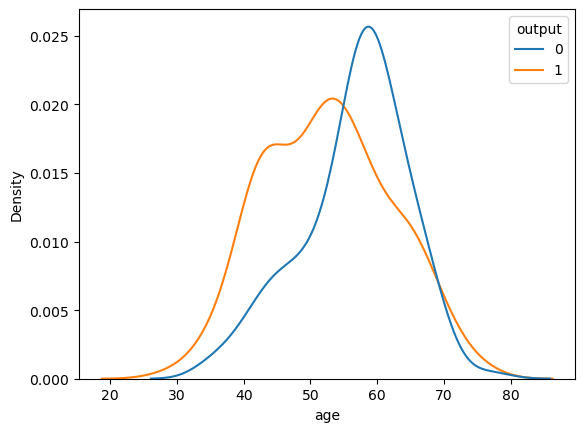

In [ ]:
age_prob = sns.kdeplot(data = df, hue = 'output', x = 'age')

I Find it strange, the fact that you're unlikely to get a heart attack if you survived your mid fifties. Though the analysis so, but I am not convinved yet.

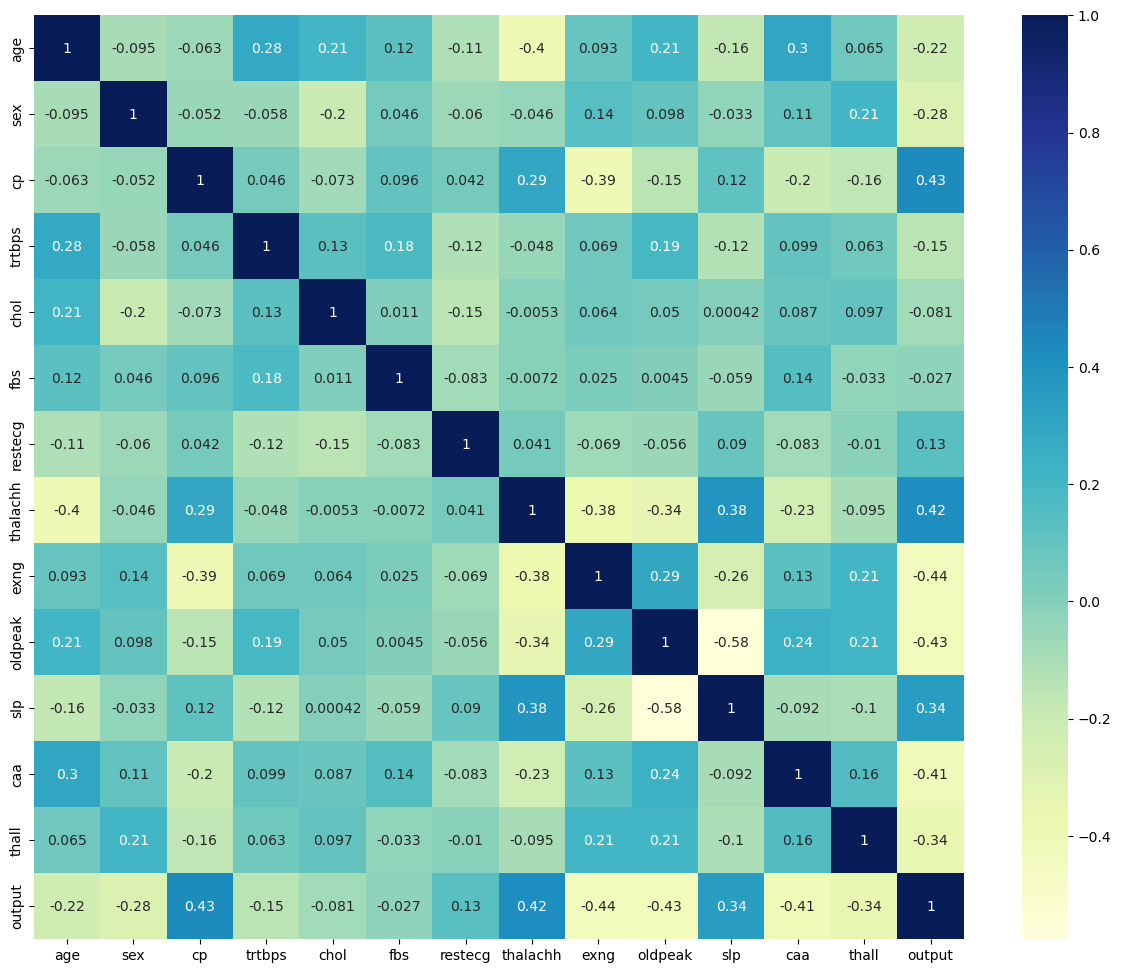

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

# Sex

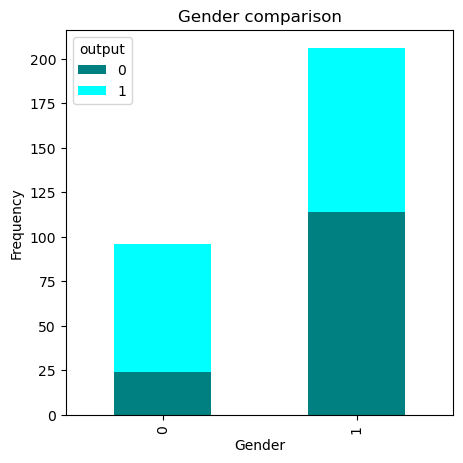

In [ ]:
pd.crosstab(df.sex,df.output).plot(kind="bar", stacked=True, figsize=(5,5), color=['teal','cyan'])
plt.title('Gender comparison')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Males tend to have Heart Attack more than females

# cp

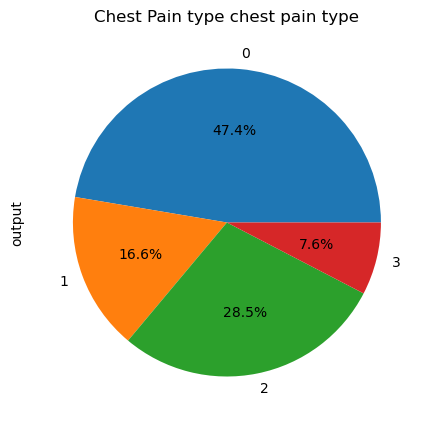

In [ ]:
pie = df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',figsize=(5,5),title="Chest Pain type chest pain type")

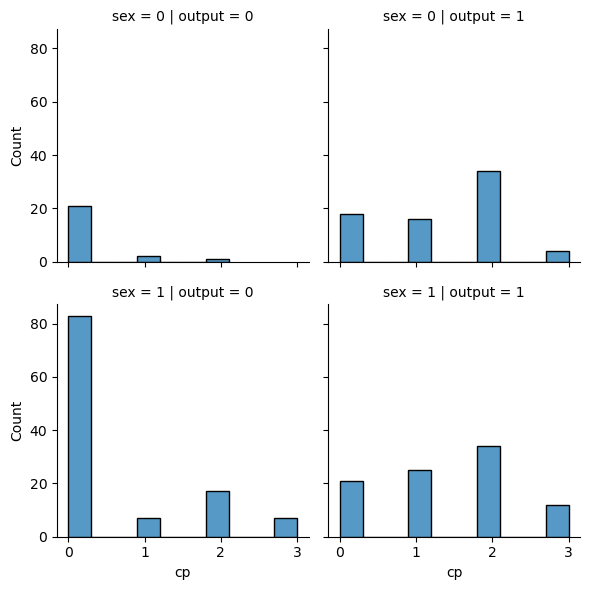

In [ ]:
g = sns.FacetGrid(df, col = 'output', row = 'sex', height=3) 
g.map(sns.histplot, "cp", binwidth=0.3 )   

The probability of men getting chest pain type 1 is 4 times higher than women getting it, No high correlation between chest pain type 1 and actually getting a heart attack

# trtbps

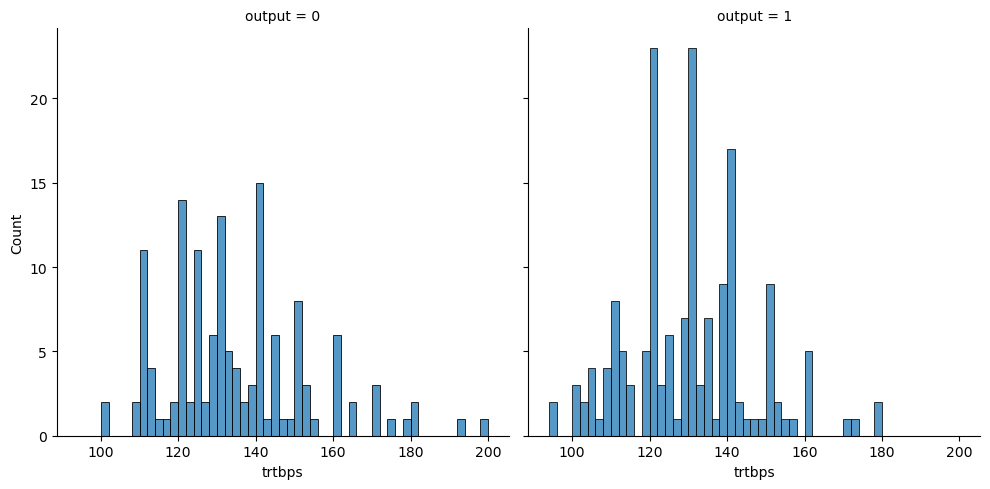

In [ ]:
g = sns.FacetGrid(df, col = 'output', height=5) 
g.map(sns.histplot, "trtbps", binwidth = 2 ) 

For blood pressure: overall, it's a weak coorelation, but I managed to get the following information from the data.

At its normal state: there is no coorelation between getting a heart attack. 
Above 120: (Which is the bloob pressure normal state) it's more likely to get a heart attack.
Above 160: there is no certanity a person would get a heart attack. 

# chol

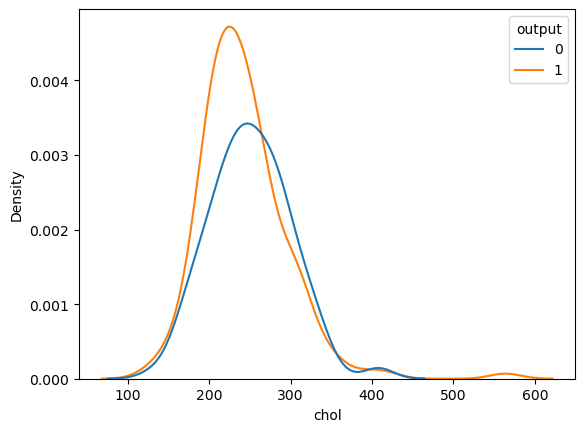

In [ ]:
chol_prob = sns.kdeplot(data = df, hue = 'output', x = 'chol')

People with a higher amount of cholestrol in their blood are more likely to get a heart attack.

# fbs

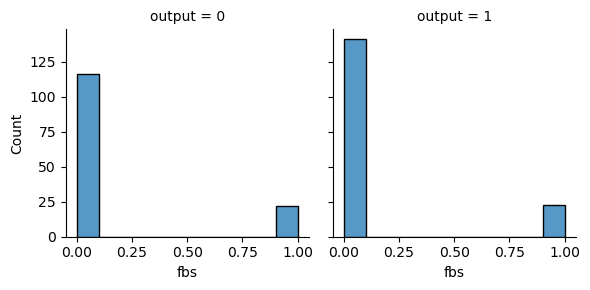

In [ ]:
g = sns.FacetGrid(df, col = 'output', height=3) 
g.map(sns.histplot, "fbs", binwidth=0.1 )  

There is a significant indication that higher blood sugar indicates a heart attack #Weak Coorelation.

# restecg

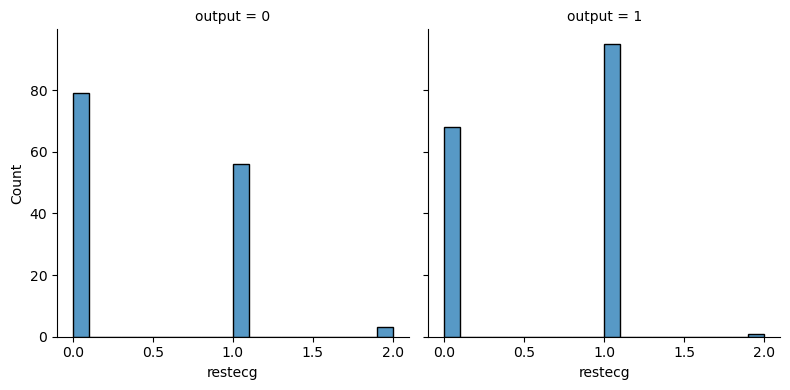

In [ ]:
g = sns.FacetGrid(df, col = 'output', height=4) 
g.map(sns.histplot, "restecg", binwidth = 0.1 ) 

We spoke earlier about three results you can get from the "restecg" column, idicating that the second type shows a problem in the heart. Well, the data also says so, as there is a higher chance of getting a heart attack with type 2(represnted by 1 in the dataset).

# thalachh

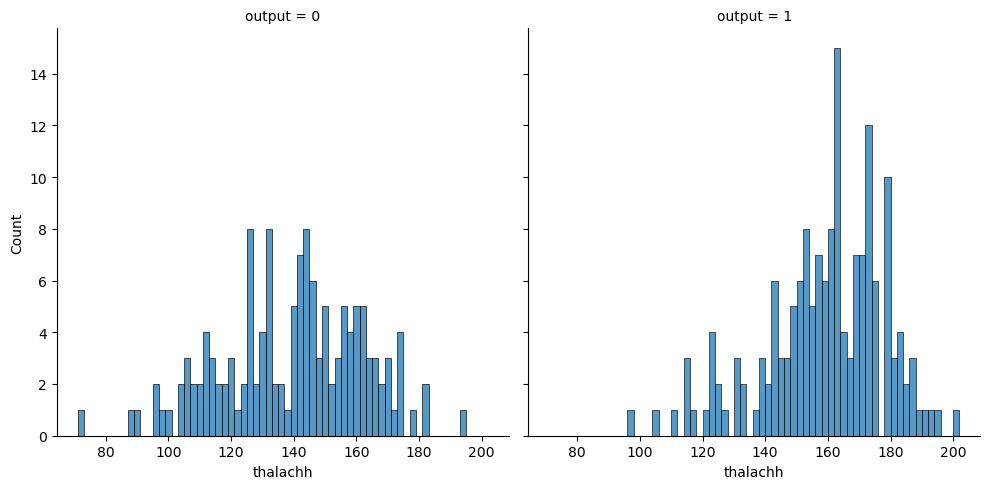

In [ ]:
g = sns.FacetGrid(df, col = 'output', height=5) 
g.map(sns.histplot, "thalachh", binwidth = 2 ) 

There is a strong coorelation between achieving a heart rate that is higher than 140 and getting a heart attack.

# exng

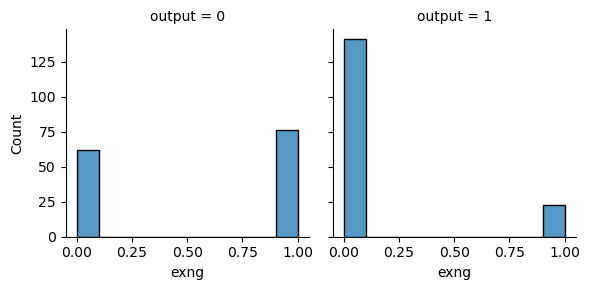

In [ ]:
g = sns.FacetGrid(df, col = 'output', height=3) 
g.map(sns.histplot, "exng", binwidth=0.1 )   

People who survived a previous stroke before has a higher chance of 50% to get a heart attack.

# thall

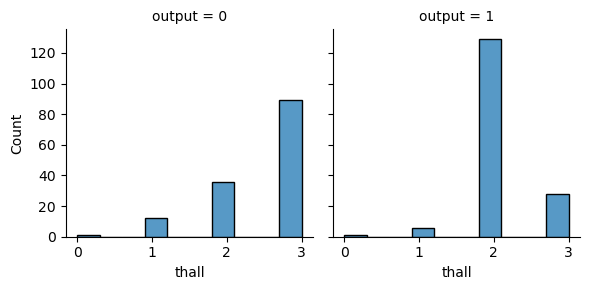

In [ ]:
g = sns.FacetGrid(df, col = 'output') 
g.map(sns.histplot, "thall", binwidth=0.3 )   

for the "thall", type 2 indicates a higher probability of getting a heart attack.

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","slp","caa","thall","output"]]=df[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","slp","caa","thall","output"]].astype(object)

In [ ]:
df.describe(include=object)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,slp,caa,thall,output
count,302,302,302,302,302,302,302,302,302,302,302,302,302
unique,41,2,4,49,152,2,3,91,2,3,5,4,2
top,58,1,0,120,204,0,1,162,0,2,0,2,1
freq,19,206,143,37,6,257,151,11,203,141,175,165,164


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
catdf=df.drop(newdf.columns,axis=1)
catdf.drop(["output"],axis=1,inplace=True)
print("continous attributes")
print(newdf.columns)
print("categorical attributes")
print(catdf.columns)

continous attributes
Index(['oldpeak'], dtype='object')
categorical attributes
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'slp', 'caa', 'thall'],
      dtype='object')


# Feature selection

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\anacond

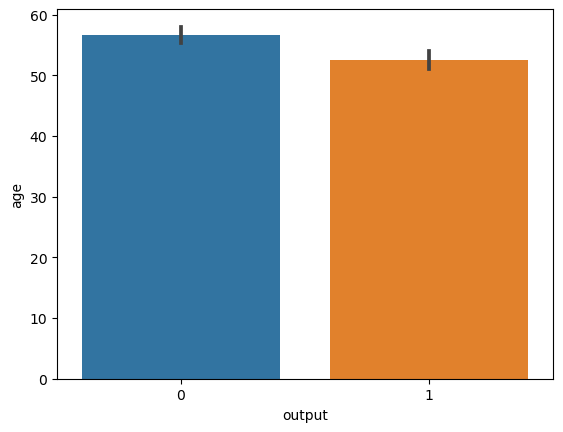

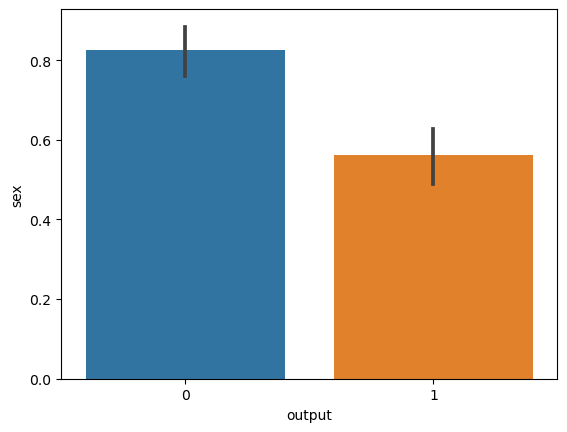

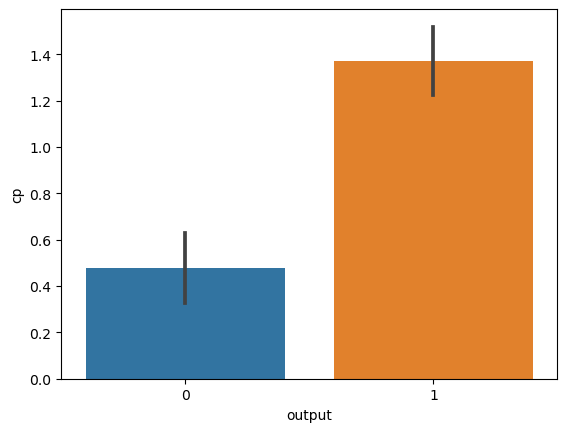

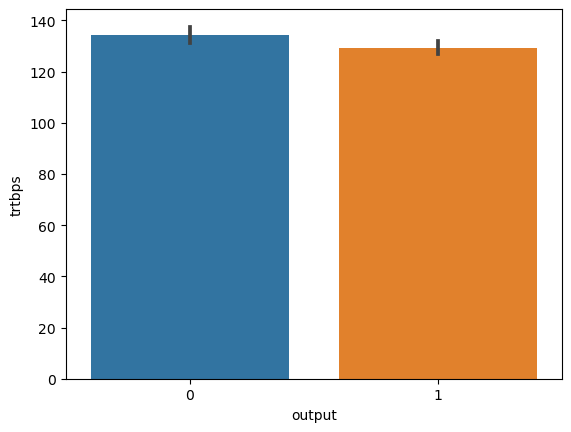

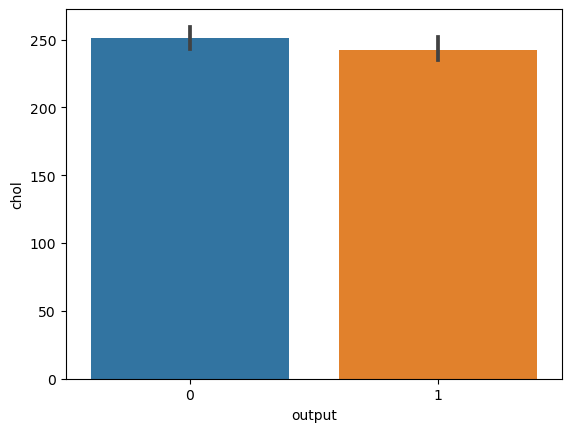

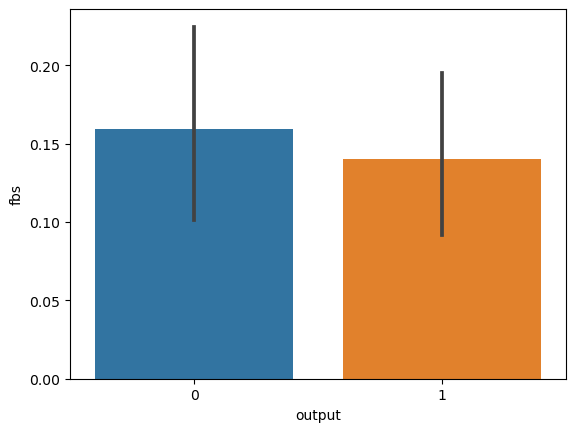

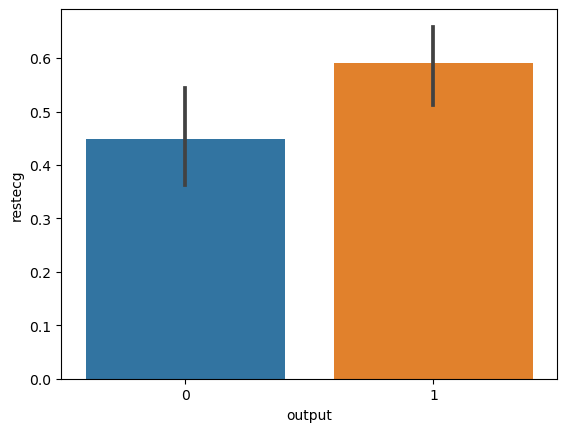

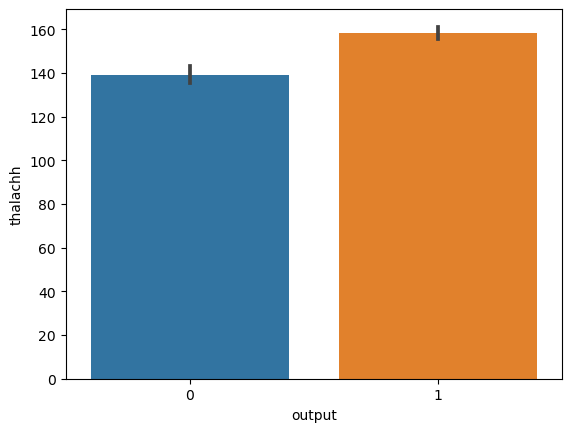

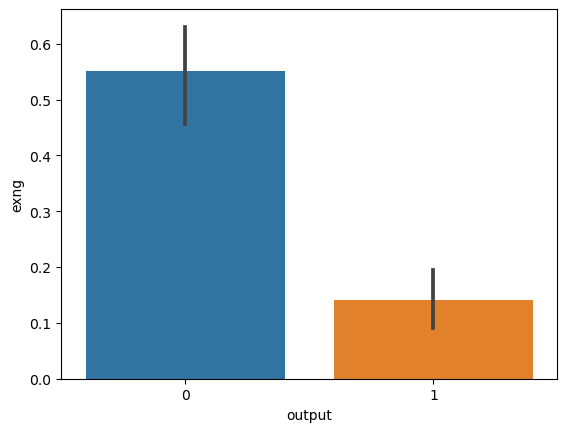

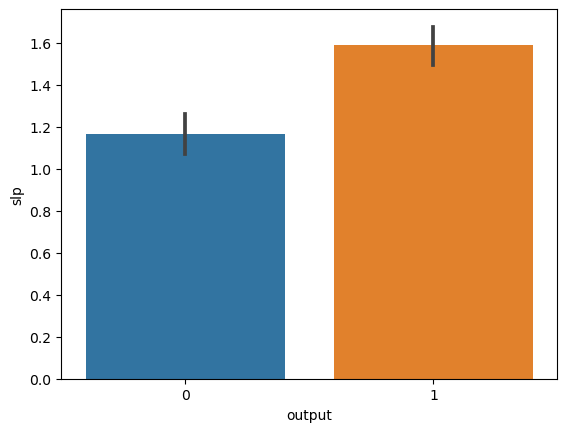

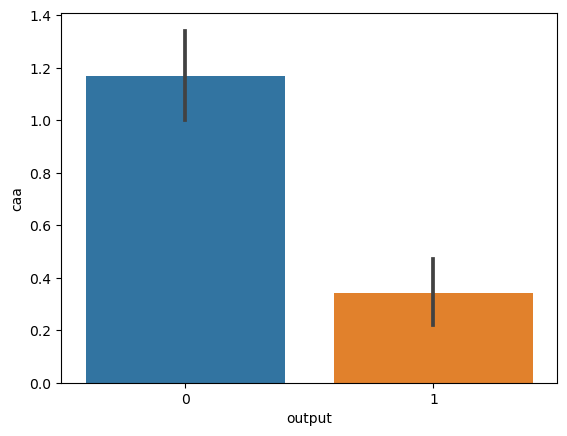

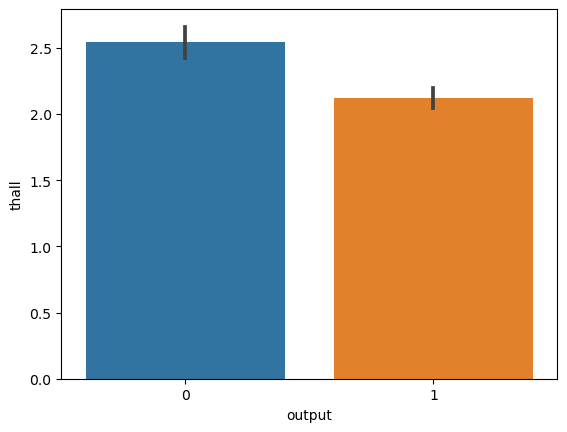

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in catdf.columns:
    plt.figure(i)
    sns.barplot(df["output"],df[i])

# Anova Test

In [ ]:
from scipy import stats
import scipy.stats
def anova_test(cat,nem):
    grouped_test2=df[[cat, nem]].groupby([cat])
    lst=[]
    for i in df[cat].unique():
        lst.append(list(grouped_test2.get_group(i)[nem]))
    f_val, p_val = stats.f_oneway(*lst) 
    print("f_statistics\n",f_val,p_val)
    dfn1=len(df[cat].unique())-1
    dfd1=len(df[cat].index)-len(df[cat].unique())
    print("degree of freedom\n",dfn1,dfd1)
    f_crit=scipy.stats.f.ppf(q=1-.05, dfn=dfn1, dfd=dfd1)
    print("f_critical\n",f_crit)
    if f_val>f_crit and p_val<0.05:
        print(cat,"attribute accepted")
        print("_______________________________")
        return True
    else:
        print(cat,"attribute rejected")
        print("_______________________________")
        return False
    

In [ ]:
lst_imp=[]
for i in catdf.columns:
    if(anova_test("output",i)):
        lst_imp.append(i)
        


f_statistics
 15.47451133242557 0.00010394837285417
degree of freedom
 1 300
f_critical
 3.8726422617304435
output attribute accepted
_______________________________
f_statistics
 26.240952119709114 5.402435780432204e-07
degree of freedom
 1 300
f_critical
 3.8726422617304435
output attribute accepted
_______________________________
f_statistics
 68.8642990077877 3.62738387725446e-15
degree of freedom
 1 300
f_critical
 3.8726422617304435
output attribute accepted
_______________________________
f_statistics
 6.558676352251473 0.010926538861949038
degree of freedom
 1 300
f_critical
 3.8726422617304435
output attribute accepted
_______________________________
f_statistics
 2.0028884801923676 0.15803697464249503
degree of freedom
 1 300
f_critical
 3.8726422617304435
output attribute rejected
_______________________________
f_statistics
 0.2160452822910174 0.6424070490676501
degree of freedom
 1 300
f_critical
 3.8726422617304435
output attribute rejected
_______________________________

In [ ]:
lst_imp

['age',
 'sex',
 'cp',
 'trtbps',
 'restecg',
 'thalachh',
 'exng',
 'slp',
 'caa',
 'thall']

In [ ]:
for i in catdf.columns:
    print("cross tab for",i)
    ct=pd.crosstab(index=catdf[i],columns=df["output"],normalize='index',dropna=True)
    print(ct)
    print("___________")

cross tab for age
output         0         1
age                       
29      0.000000  1.000000
34      0.000000  1.000000
35      0.500000  0.500000
37      0.000000  1.000000
38      0.500000  0.500000
39      0.250000  0.750000
40      0.666667  0.333333
41      0.100000  0.900000
42      0.125000  0.875000
43      0.375000  0.625000
44      0.272727  0.727273
45      0.250000  0.750000
46      0.428571  0.571429
47      0.400000  0.600000
48      0.428571  0.571429
49      0.400000  0.600000
50      0.428571  0.571429
51      0.250000  0.750000
52      0.307692  0.692308
53      0.250000  0.750000
54      0.375000  0.625000
55      0.625000  0.375000
56      0.545455  0.454545
57      0.588235  0.411765
58      0.631579  0.368421
59      0.642857  0.357143
60      0.727273  0.272727
61      0.875000  0.125000
62      0.636364  0.363636
63      0.666667  0.333333
64      0.400000  0.600000
65      0.500000  0.500000
66      0.428571  0.571429
67      0.666667  0.333333
68      0.

# Chi Test

In [ ]:
lst_cat_imp=[]
for i in catdf.columns:   
    chi_data=pd.crosstab(index=df[i],columns=df['output'])
    chi_lst=[]
    for ind,row in chi_data.iterrows():
        chi_lst.append(row.values)
    (chi2,p,dof,_)=stats.chi2_contingency(chi_lst)
    import scipy
    crit=scipy.stats.chi2.ppf(1-0.05, dof)
    if p<0.05:
        print(i,"accepted")
        lst_cat_imp.append(i)
        lst_imp.append(i)
    else:
        pass
print(lst_imp)

sex accepted
cp accepted
restecg accepted
exng accepted
slp accepted
caa accepted
thall accepted
['age', 'sex', 'cp', 'trtbps', 'restecg', 'thalachh', 'exng', 'slp', 'caa', 'thall', 'sex', 'cp', 'restecg', 'exng', 'slp', 'caa', 'thall']


In [ ]:
df[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","slp","caa","thall","output"]]=df[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","slp","caa","thall","output"]].astype(float)

In [ ]:
df.corr()["output"]

age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
output      1.000000
Name: output, dtype: float64

In [ ]:
lst_imp=['age','sex','cp','trtbps','restecg','thalachh','exng','slp','caa','thall']

# Data Splitting

In [ ]:
x=df[lst_imp]
y=df["output"]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

std  = MinMaxScaler()
X = pd.DataFrame(std.fit_transform(x) , columns=x.columns)
X

,age,sex,cp,trtbps,restecg,thalachh,exng,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.0,0.603053,0.0,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.5,0.885496,0.0,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.0,0.770992,0.0,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.5,0.816794,0.0,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.5,0.702290,1.0,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.0,0.000000,0.433962,0.5,0.396947,1.0,0.5,0.00,1.000000
298,0.333333,1.0,1.000000,0.150943,0.5,0.465649,0.0,0.5,0.00,1.000000
299,0.812500,1.0,0.000000,0.471698,0.5,0.534351,0.0,0.5,0.50,1.000000
300,0.583333,1.0,0.000000,0.339623,0.5,0.335878,1.0,0.5,0.25,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

# Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [ ]:
import sys
!{sys.executable} -m pip install xgboost
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip3 install catboost
from catboost import CatBoostClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [[CatBoostClassifier(verbose=0),'CatBoost Classifier'],[XGBClassifier(),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC'],[LGBMClassifier(),'LGBM Classifier'],
              [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score , confusion_matrix
from sklearn.inspection import permutation_importance

for cls in classifiers:
    model = cls[0]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print("-----------------")
    print(cls[1])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print("Recall : ", recall_score(y_test, y_pred) *  100)
    print("Precision : ", precision_score(y_test, y_pred) *  100)
    print("F1 score : ", f1_score(y_test, y_pred) *  100)

-----------------
CatBoost Classifier
Confusion Matrix:
[[29  5]
 [ 3 39]]
Accuracy :  89.47368421052632
Recall :  92.85714285714286
Precision :  88.63636363636364
F1 score :  90.69767441860465
-----------------
XGB Classifier
Confusion Matrix:
[[31  3]
 [ 4 38]]
Accuracy :  90.78947368421053
Recall :  90.47619047619048
Precision :  92.6829268292683
F1 score :  91.56626506024097
-----------------
Random Forest
Confusion Matrix:
[[30  4]
 [ 3 39]]
Accuracy :  90.78947368421053
Recall :  92.85714285714286
Precision :  90.69767441860465
F1 score :  91.76470588235294
-----------------
K-Nearest Neighbours
Confusion Matrix:
[[28  6]
 [ 3 39]]
Accuracy :  88.1578947368421
Recall :  92.85714285714286
Precision :  86.66666666666667
F1 score :  89.65517241379311
-----------------
SGD Classifier
Confusion Matrix:
[[31  3]
 [ 8 34]]
Accuracy :  85.52631578947368
Recall :  80.95238095238095
Precision :  91.8918918918919
F1 score :  86.0759493670886
-----------------
SVC
Confusion Matrix:
[[29  5]


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The best algorithm for predicting Heart Attack is SVC

* Accuracy :  92.10526315789474
* Recall :  97.61904761904762
* Precision :  89.13043478260869
* F1 score :  93.18181818181817